# Correlation and Lag Analysis Using statsmodels

https://www.statsmodels.org/stable/_modules/statsmodels/tsa/stattools.html#ccf

In [2]:
import pandas as pd
import numpy as np

In [177]:
from numpy.random import randn
np.random.seed(201)

# Example 1

In [178]:
idx = pd.date_range('7/8/2018', periods=20, freq='D')

In [179]:
df = pd.DataFrame(randn(20,2),index=idx, columns='x y'.split())

In [180]:
from statsmodels.tsa.stattools import ccf

In [181]:
ccf_result = ccf(df['x'], df['y'], adjusted=True)

In [182]:
df['ccf_resuls'] = ccf_result

<AxesSubplot:>

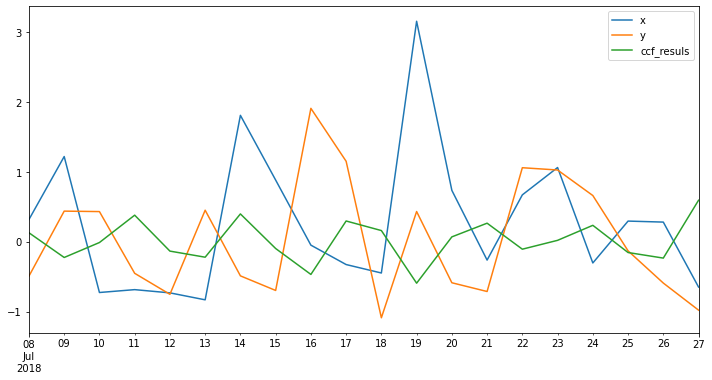

In [183]:
df.plot(figsize=(12,6))

# Example 2

In [159]:
idx_2 =  pd.date_range('1/04/2021', periods=10, freq='D')

In [160]:
idx_2.shape

(10,)

In [161]:
x = np.array(range(10))
y = np.array(range(10))


In [162]:
data = np.array([x,y])

In [163]:
data = np.transpose(data)

In [164]:
data

array([[0, 0],
       [1, 1],
       [2, 2],
       [3, 3],
       [4, 4],
       [5, 5],
       [6, 6],
       [7, 7],
       [8, 8],
       [9, 9]])

In [165]:
df_2 = pd.DataFrame(data, index=idx_2, columns='x y'.split())

In [166]:
ccf_result_2 = ccf(df_2['x'], df_2['y'], adjusted=True)

In [167]:
ccf_result_2

array([ 1.        ,  0.77777778,  0.51515152,  0.21212121, -0.13131313,
       -0.51515152, -0.93939394, -1.4040404 , -1.90909091, -2.45454545])

In [168]:
df_2['ccf_resuls'] = ccf_result_2

In [169]:
df_2

,x,y,ccf_resuls
2021-01-04,0,0,1.000000
2021-01-05,1,1,0.777778
2021-01-06,2,2,0.515152
2021-01-07,3,3,0.212121
2021-01-08,4,4,-0.131313
2021-01-09,5,5,-0.515152
2021-01-10,6,6,-0.939394
2021-01-11,7,7,-1.404040
2021-01-12,8,8,-1.909091
2021-01-13,9,9,-2.454545


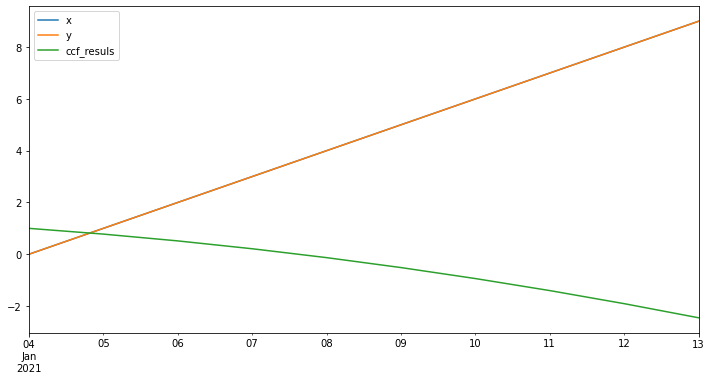

In [151]:
df_2.plot(figsize=(12,6));

In [154]:
ccf_result_2

array([ 1.        ,  0.77777778,  0.51515152,  0.21212121, -0.13131313,
       -0.51515152, -0.93939394, -1.4040404 , -1.90909091, -2.45454545])

In [172]:
np.correlate(data[:,0],data[:,1])

array([285])

In [198]:
ccf_result_2_df = pd.DataFrame(ccf_result_2)

In [199]:
ccf_result_2_df

,0
0,1.000000
1,0.777778
2,0.515152
3,0.212121
4,-0.131313
5,-0.515152
6,-0.939394
7,-1.404040
8,-1.909091
9,-2.454545


<AxesSubplot:>

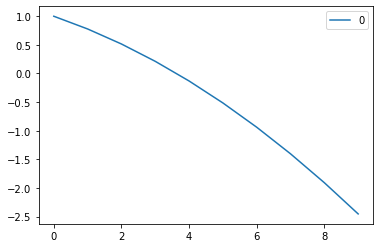

In [200]:
ccf_result_2_df.plot()

https://python.hotexamples.com/examples/statsmodels.tsa.stattools/-/ccf/python-ccf-function-examples.html

In [201]:
# def plotCCF(lcTime, lcIntA, lcIntB, **kwargs):
#     '''
#     calculate cross correlation between two lc
#     '''
#     corr = ccf(lcIntA, lcIntB)
#     plt.plot(lcTime,corr,**kwargs)
#     plt.xlabel(r"$\tau(s)$",fontsize=14)
#     plt.ylabel(r"$\rho(\tau)$",fontsize=14)
#     plt.title(r"Cross-correlation $\rho(\tau)$ of two LCs",fontsize=14)
#     plt.show()

In [202]:
def plotCCF(lcTime, lcIntA, lcIntB):
    '''
    calculate cross correlation between two lc
    '''
    corr = ccf(lcIntA, lcIntB)
    plt.plot(lcTime,corr)
    plt.xlabel(r"$\tau(s)$",fontsize=14)
    plt.ylabel(r"$\rho(\tau)$",fontsize=14)
    plt.title(r"Cross-correlation $\rho(\tau)$ of two LCs",fontsize=14)
    plt.show()

In [203]:
df_2

,x,y,ccf_resuls
2021-01-04,0,0,1.000000
2021-01-05,1,1,0.777778
2021-01-06,2,2,0.515152
2021-01-07,3,3,0.212121
2021-01-08,4,4,-0.131313
2021-01-09,5,5,-0.515152
2021-01-10,6,6,-0.939394
2021-01-11,7,7,-1.404040
2021-01-12,8,8,-1.909091
2021-01-13,9,9,-2.454545


In [204]:
df_2.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
               '2021-01-12', '2021-01-13'],
              dtype='datetime64[ns]', freq='D')

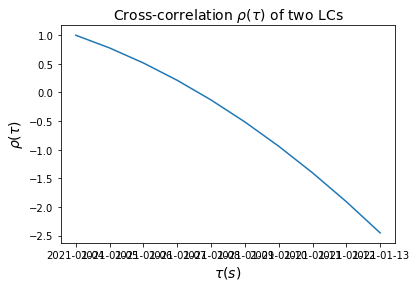

In [205]:
plotCCF(df_2.index, df_2['x'], df_2['y'] )

https://stats.stackexchange.com/questions/339782/why-are-the-results-of-rs-ccf-and-scipys-correlate-different/353408

ValueError: x and y must have same first dimension, but have shapes (21,) and (0,)

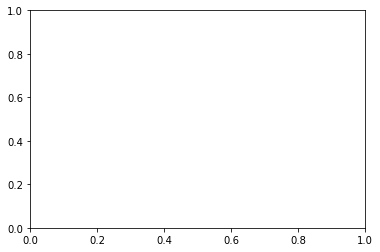

In [207]:
#Make a plot like ccf
f, ax = plt.subplots()
ax.stem(np.arange(-10,11), ccf_result_2[-5:5], '-.')
ax.set_xticks(np.arange(-10,11))
plt.show()

# Cross - and Auto-Correlation Demo

https://matplotlib.org/stable/gallery/lines_bars_and_markers/xcorr_acorr_demo.html#sphx-glr-gallery-lines-bars-and-markers-xcorr-acorr-demo-py

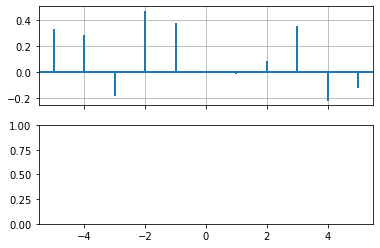

In [194]:
import matplotlib.pyplot as plt
import numpy as np


# Fixing random state for reproducibility
np.random.seed(19680801)

x, y = np.random.randn(2, 10)
fig, [ax1, ax2] = plt.subplots(2, 1, sharex=True)
ax1.xcorr(x, y, usevlines=True, maxlags=5, normed=True, lw=2)
ax1.grid(True)

# ax2.acorr(x, usevlines=True, normed=True, maxlags=5, lw=2)
# ax2.grid(True)

plt.show()